<a href="https://colab.research.google.com/github/Hackveda/FullStackDeveloperCloudverks/blob/main/Curved_Text_Detection_and_Recognition_Main_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!wget http://www.iapr-tc11.org/dataset/ICDAR2003_RobustReading/TrialTrain/word.zip

--2021-10-05 12:56:41--  http://www.iapr-tc11.org/dataset/ICDAR2003_RobustReading/TrialTrain/word.zip
Resolving www.iapr-tc11.org (www.iapr-tc11.org)... 157.16.221.56
Connecting to www.iapr-tc11.org (www.iapr-tc11.org)|157.16.221.56|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18358638 (18M) [application/zip]
Saving to: ‘word.zip’

word.zip            100%[===================>]  17.51M  9.71MB/s    in 1.8s    

2021-10-05 12:56:43 (9.71 MB/s) - ‘word.zip’ saved [18358638/18358638]



In [5]:
!unzip word.zip

Archive:  word.zip
  inflating: word.xml                
   creating: word/
   creating: word/1/
  inflating: word/1/1.jpg            
  inflating: word/1/10.jpg           
  inflating: word/1/100.jpg          
  inflating: word/1/11.jpg           
  inflating: word/1/12.jpg           
  inflating: word/1/13.jpg           
  inflating: word/1/14.jpg           
  inflating: word/1/15.jpg           
  inflating: word/1/16.jpg           
  inflating: word/1/17.jpg           
  inflating: word/1/18.jpg           
  inflating: word/1/19.jpg           
  inflating: word/1/2.jpg            
  inflating: word/1/20.jpg           
  inflating: word/1/21.jpg           
  inflating: word/1/22.jpg           
  inflating: word/1/23.jpg           
  inflating: word/1/24.jpg           
  inflating: word/1/25.jpg           
  inflating: word/1/26.jpg           
  inflating: word/1/27.jpg           
  inflating: word/1/28.jpg           
  inflating: word/1/29.jpg           
  inflating: word/1/3.jpg    

In [39]:
!pip install beautifulsoup4
!pip install easyocr
!pip install lxml

In [25]:
class ProposedIsolatedPoolTransposedNeuralNetwork:
  def __init__(self):
    random.seed(1) # Input seed for randomization
    self.weights = 2 * random.random((5, 1)) - 1
    print(self.weights)

  def sigmoid(self, z):
    return 1 / (1 + exp(-z)) # Sigmoid Acitivation Fn

  def sigmoid_derivative(self, x):
    return x * ( 1 - x) # output * ( 1 - output )

  def train(self, x, y, epoch):
    for i in range(epoch):
      # Calculate the output of neuron 
      output = self.sigmoid(dot(x, self.weights)) # sig(z) = (1 / (1 + exp (-z)))
      # Calculate the error 
      error = y - output
      # Perform adjustment of the weights / Learning the weights
      adjustment = dot(x.T, (error * self.sigmoid_derivative(output)))
      # Use the adjusted weight as the new learned weight
      self.weights += adjustment
      #print("Adjusted wight on ", i, "iteration is ", self.weights)
      print("Error at iteration", i, "is", error)

  def predict(self, x):
    return self.sigmoid(dot(x, self.weights))

if __name__ == "__main__":
  pnn = ProposedIsolatedPoolTransposedNeuralNetwork()
  #X = X.to_numpy() # Convert dataframe into an array
  #Y = Y.to_numpy()
  #Y = Y.reshape(-1, 1) # Convert the Y from horizontal to vertical
  #pnn.train(X, Y, 100) # Train the model. Learn the best weights in 100 iteration
  #print(pnn.predict([1, 0, 0, 0, 0])) # Test Case for prediction using neural network

[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]
 [-0.39533485]
 [-0.70648822]]


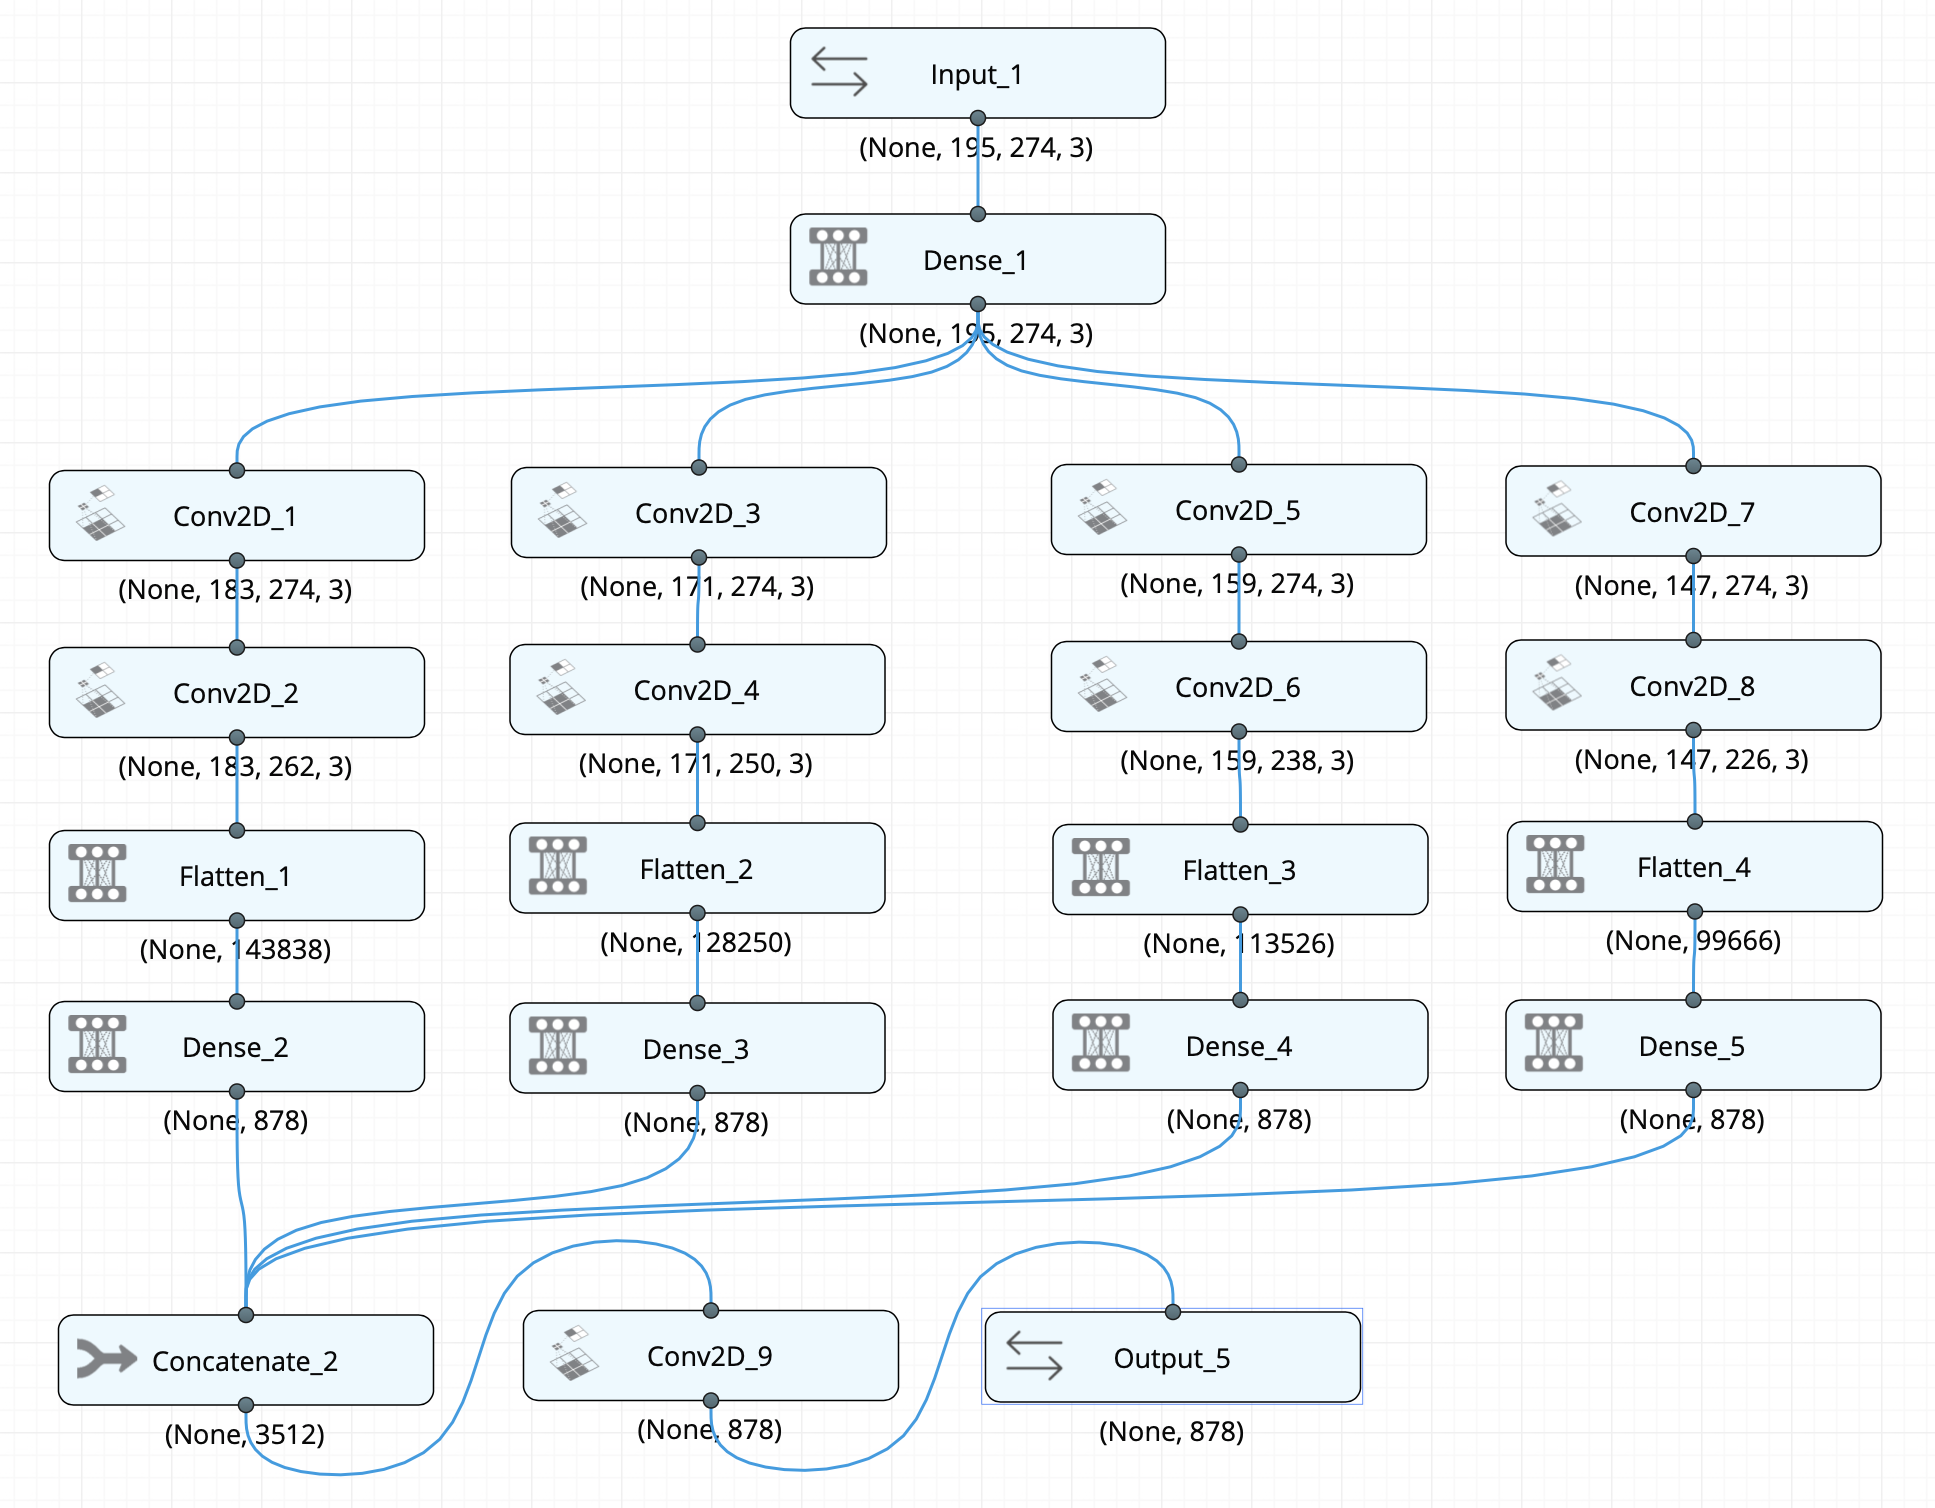

In [26]:
# Our Custom Neural Network for Curved Text Detection and Recognition
image = cv2.imread("/content/Curved Text Detection and Recognition Custom Neural Network.png")
cv2_imshow(image)

In [57]:
import tensorflow.keras
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers.convolutional import Conv2D
from tensorflow.python.keras.layers.core import Flatten
from tensorflow.python.keras.layers.merge import Concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import *
from tensorflow.keras.models import load_model
from imutils.contours import sort_contours
import numpy as np
from numpy import random, asarray
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow
from easyocr import Reader as custompredict
import argparse
import cv2
import xml.dom.minidom as xml
from PIL import Image
import matplotlib.pyplot as plt
import numpy as dev


def get_model():
	aliases = {}
	Input_1 = Input(shape=(195, 274, 3), name='Input_1')
	Dense_1 = Dense(name='Dense_1',units= 3)(Input_1)
	Conv2D_7 = Conv2D(name='Conv2D_7',filters= 3,kernel_size= (3,1),dilation_rate= 24,activation= 'softmax' )(Dense_1)
	Conv2D_8 = Conv2D(name='Conv2D_8',filters= 3,kernel_size= (1,3),dilation_rate= 24,activation= 'softmax' )(Conv2D_7)
	Flatten_4 = Flatten(name='Flatten_4')(Conv2D_8)
	Dense_5 = Dense(name='Dense_5',units= 878)(Flatten_4)
	Conv2D_5 = Conv2D(name='Conv2D_5',filters= 3,kernel_size= (3,1),dilation_rate= 18,activation= 'softmax' )(Dense_1)
	Conv2D_6 = Conv2D(name='Conv2D_6',filters= 3,kernel_size= (1,3),dilation_rate= 18,activation= 'softmax' )(Conv2D_5)
	Flatten_3 = Flatten(name='Flatten_3')(Conv2D_6)
	Dense_4 = Dense(name='Dense_4',units= 878)(Flatten_3)
	Conv2D_3 = Conv2D(name='Conv2D_3',filters= 3,kernel_size= (3,1),dilation_rate= 12,activation= 'softmax' )(Dense_1)
	Conv2D_4 = Conv2D(name='Conv2D_4',filters= 3,kernel_size= (1,3),dilation_rate= 12,activation= 'softmax' )(Conv2D_3)
	Flatten_2 = Flatten(name='Flatten_2')(Conv2D_4)
	Dense_3 = Dense(name='Dense_3',units= 878)(Flatten_2)
	Conv2D_1 = Conv2D(name='Conv2D_1',filters= 3,kernel_size= (3,1),dilation_rate= 6,activation= 'softmax' )(Dense_1)
	Conv2D_2 = Conv2D(name='Conv2D_2',filters= 3,kernel_size= (1,3),dilation_rate= 6,activation= 'softmax' )(Conv2D_1)
	Flatten_1 = Flatten(name='Flatten_1')(Conv2D_2)
	Dense_2 = Dense(name='Dense_2',units= 878)(Flatten_1)
	Concatenate_2 = Concatenate(name='Concatenate_2')([Dense_2,Dense_3,Dense_4,Dense_5])
	Conv2D_9 = Conv2D(name='Conv2D_9',filters= 878,kernel_size= (1,1))(Concatenate_2)

	model = Model([Input_1],[Conv2D_9])
	return aliases, model


from tensorflow.keras.optimizers import *

def get_optimizer():
	return Adadelta()

def is_custom_loss_function():
	return False

def get_loss_function():
	return 'categorical_crossentropy'

def get_batch_size():
	return 32

def get_num_epoch():
	return 10

def get_data_config():
	return '{"mapping": {"Unnamed: 0": {"type": "Numeric", "port": "Ignore", "shape": "", "options": {"Scaling": 1, "Normalization": false}}, "Images": {"type": "Image", "port": "InputPort0", "shape": "", "options": {}}, "Text": {"type": "Categorical", "port": "OutputPort0", "shape": "", "options": {}}}, "numPorts": 1, "samples": {"training": 924, "validation": 231, "test": 0, "split": 1}, "dataset": {"name": "CurvedTextDataset", "type": "private", "samples": 1156}, "datasetLoadOption": "batch", "shuffle": false, "kfold": 1}'

In [59]:
from __future__ import print_function
import os

import sys
import time
import yaml
import pickle
import traceback
import pandas as pd
import numpy as np
from pylib import *
import scipy.misc
import scipy.io.wavfile
from sklearn.preprocessing import LabelEncoder
from importlib.machinery import SourceFileLoader
from multiprocessing import cpu_count
from matplotlib.pyplot import imread
from PIL import Image

os.environ["MKL_NUM_THREADS"] = str(cpu_count())

def doResize(options):
    resize = None
    if options and 'Resize' in options and options['Resize'] == True:
        resize = (int(options['Width']), int(options['Height']))
    return resize


def col_pre_process(data, options):
    if len(options.keys()) == 0:
        return data
    else:
        if "pretrained" in options and options["pretrained"] != 'None':
            from tensorflow.keras.applications import inception_v3, vgg16, vgg19, resnet50
            if options["pretrained"] == 'InceptionV3':
                data = inception_v3.preprocess_input(data)
            elif options["pretrained"] == 'ResNet50':
                data = resnet50.preprocess_input(data)
            elif options["pretrained"] == 'VGG16':
                data = vgg16.preprocess_input(data)
            elif options["pretrained"] == 'VGG19':
                data = vgg19.preprocess_input(data)

        if "Scaling" in options and float(options["Scaling"]) != 0 and float(options["Scaling"]) != 1:
            data = data / float(options["Scaling"])

        if 'Normalization' in options and options['Normalization'] == True:
            mean = np.mean(data)
            std = np.std(data)
            data = data - mean
            data = data / std
            return data
        return data


def process_test_input(base_dir, test_raw, data_mapping):
    test_data = []
    le = None

    from tensorflow.keras import backend as K
    if K.backend() == 'theano' or K.backend() == 'mxnet':
        K.set_image_data_format('channels_first')
    else:
        K.set_image_data_format('channels_last')

    # determine the shape of the data to feed into the network
    for i in range(len(data_mapping['inputs'])):
        inp_port = data_mapping['inputs']['InputPort' + str(i)]
        if inp_port['details'][0]['type'] == 'Image':
            col_name = inp_port['details'][0]['name']
            if 'options' in inp_port['details'][0]:
                options = inp_port['details'][0]['options']
            else:
                options = {}

            resize = doResize(options)
            img = imread(base_dir + "/" + test_raw[col_name][0])
            input_shape = img.shape

            num_channels = 1
            if resize:
                width, height = resize
                if len(input_shape) == 3:
                    num_channels = 3
            else:
                if len(input_shape) == 2:
                    width, height = input_shape
                else:
                    width, height, num_channels = input_shape

            test_data.append(np.ndarray((len(test_raw),) +
                                        (num_channels, width, height), dtype=np.float32))

            for j, filename in enumerate(test_raw[col_name]):
                img = imread(base_dir + "/" + filename)
                if resize:
                    #new_size = tuple((np.array(resize) * 0.99999).astype(int))
                    img = np.array(Image.fromarray(img.astype(np.uint8)).resize(resize))
                    #img = scipy.misc.imresize(img, resize)
                if num_channels != 1:
                    img = np.transpose(img, (2, 0, 1))
                test_data[i][j] = img

            if K.image_data_format() == 'channels_last':
                test_data[i] = np.transpose(test_data[i], (0, 2, 3, 1))

            test_data[i] = col_pre_process(test_data[i], options)

        elif inp_port['details'][0]['type'] == 'Audio':
            if 'options' in inp_port['details'][0]:
                options = inp_port['details'][0]['options']
            else:
                options = {}

            (rate, data) = scipy.io.wavfile.read(
                base_dir + "/" + test_raw[col_name][0])
            test_data.append(np.ndarray((len(test_raw),) +
                                        data.shape, dtype=data.dtype))

            for j, filename in enumerate(test_raw[col_name]):
                (rate, data) = scipy.io.wavfile.read(base_dir + "/" + filename)
                test_data[i][j] = data
            test_data[i] = col_pre_process(test_data[i], options)

        elif inp_port['details'][0]['type'] == 'Numpy':
            if 'options' in inp_port['details'][0]:
                options = inp_port['details'][0]['options']
            else:
                options = {}

            col_name = inp_port['details'][0]['name']
            npzFile = np.load(base_dir + "/" + test_raw[col_name][0])
            x = npzFile[npzFile.files[0]]
            input_shape = x.shape

            test_data.append(np.ndarray(
                (len(test_raw),) + x.shape, dtype=np.float32))
            for j, filename in enumerate(test_raw[col_name]):
                npzFile = np.load(base_dir + "/" + filename)
                x = npzFile[npzFile.files[0]]
                test_data[i][j] = x
            test_data[i] = col_pre_process(test_data[i], options)

        else:
            col_idx = 0
            test_data.append(np.ndarray(
                (len(test_raw), inp_port['size']), dtype=np.float32))
            for col in range(len(inp_port['details'])):
                if 'options' in inp_port['details'][col]:
                    options = inp_port['details'][col]['options']
                else:
                    options = {}

                col_name = inp_port['details'][col]['name']

                if inp_port['details'][col]['type'] == 'Categorical':
                    data_col = test_raw[col_name]
                    num_categories = len(
                        inp_port['details'][col]['categories'])

                    le_temp = LabelEncoder()
                    le_temp.fit(inp_port['details'][col]['categories'])
                    data_col = le_temp.transform(data_col)

                    one_hot_array = np.zeros(
                        (len(data_col), num_categories), dtype=np.float32)
                    one_hot_array[np.arange(len(data_col)), data_col] = 1

                    test_data[i][:, col_idx:col_idx +
                                 num_categories] = col_pre_process(one_hot_array, options)
                    col_idx += num_categories

                elif inp_port['details'][col]['type'] == 'Array':
                    array = np.array(test_raw[col_name].str.split(
                        ';').tolist(), dtype=np.float32)
                    test_data[i][:, col_idx:col_idx + array.shape[1]
                                 ] = col_pre_process(array, options)
                    col_idx += array.shape[1]

                else:
                    data = test_raw[col_name].reshape((len(test_raw), 1))
                    test_data[i][:, col_idx:col_idx +
                                 1] = col_pre_process(data, options)
                    col_idx += 1

    # assuming single output, generate labelEncoder
    out_port = data_mapping['outputs']['OutputPort0']
    if out_port['details'][0]['type'] == 'Categorical':
        le = LabelEncoder()
        le.fit(out_port['details'][0]['categories'])

    return test_data, le


def _custompredict(test_data, config, modelFile):
    res = None
    loss_func = config['params']['loss_func']
    if 'is_custom_loss' in config['params']:
        isCustomLoss = config['params']['is_custom_loss']
    else:
        isCustomLoss = False

    if isCustomLoss:
        customLoss = SourceFileLoader(
            "customLoss", 'customLoss.py').load_module()
        loss_function = eval('customLoss.' + loss_func)
        mod = load_model(modelFile, custom_objects={loss_func: loss_function})
    else:
        mod = load_model(modelFile)
    
    # disabling temporarily
    #if os.environ.get("GPU_ENABLED", "0") == "1":
    #    mod.compile (loss='categorical_crossentropy', optimizer='adam', context=["GPU(0)"])
        
    return mod.predict(test_data)


def test_model(input_file):

    try:
        if os.path.exists('model.h5') and os.path.exists('mapping.pkl'):

            with open('mapping.pkl', 'rb') as f:
                data_mapping = pickle.load(f)

            test_raw = pd.read_csv(input_file)

            test_data, le = process_test_input(
                os.path.dirname(input_file), test_raw, data_mapping)

            currentDir = os.getcwd()

            with open('config.yaml', 'r') as f:
                config = yaml.load(f, Loader=yaml.Loader)
                models = []
                if "kfold" in config["data"] and config["data"]["kfold"] > 1:
                    kfold = config["data"]["kfold"]

                    if os.path.exists('model.h5'):
                        models.append(currentDir + '/model.h5')
                    else:
                        for sub_run in range(1, kfold + 1):
                            sub_dir = currentDir + str(sub_run)
                            if os.path.exists(sub_dir + "/model.h5"):
                                models.append(sub_dir + "/model.h5")
                else:
                    models.append(currentDir + '/model.h5')

            result = np.array([])
            for modelFile in models:
                res = customPredict(test_data, config, modelFile)
                if result.size != 0:
                    result = res + result
                else:
                    result = res

            res = result / len(models)

            out_type = data_mapping['outputs']['OutputPort0']['details'][0]['type']

            num_samples = len(test_raw)
            if num_samples != 0:
                out_dir = "./"
                if not os.path.exists(out_dir + "output/"):
                    os.makedirs(out_dir + "output/")
                if out_type == "Numpy":
                    if not os.path.exists(out_dir + "output/"):
                        os.makedirs(out_dir + "output/")
                    temp = np.ndarray((res.shape[0],), dtype=np.object_)
                    for i in range(res.shape[0]):
                        filename = "./output/" + str(i) + ".npy"
                        np.save(out_dir + filename, res[i])
                        temp[i] = filename

                    test_raw['predictions'] = temp
                elif out_type == 'Array':
                    temp = np.ndarray((res.shape[0],), dtype=np.object_)
                    res = np.round(res,  decimals=2)
                    for i in range(res.shape[0]):
                        temp[i] = np.array2string(
                            res[i], precision=2, separator=';')
                    test_raw['predictions'] = temp
                elif out_type == 'Categorical' and le != None:
                    res_prob = np.round(
                        np.max(res, axis=1).astype(float), decimals=4)
                    res_id = np.argmax(res, axis=1)
                    res1 = le.inverse_transform(res_id.tolist())
                    test_raw['predictions'] = res1
                    test_raw['probabilities'] = res_prob
                elif out_type == "Image":
                    temp = np.ndarray((res.shape[0],), dtype=np.object_)
                    from tensorflow.keras import backend as K
                    if K.image_data_format() == 'channels_first':
                        res = np.transpose(res, (0, 2, 3, 1))
                        
                    for i in range(res.shape[0]):
                        filename = "./output/" + str(i) + str(round(time.time())) + ".png"
                        if res.shape[-1] == 1:
                            img = np.reshape(
                                res[i], (res.shape[1], res.shape[2]))
                        else:
                            img = res[i]
                        scipy.misc.imsave(out_dir + filename, img)
                        temp[i] = filename

                    test_raw['predictions'] = temp
                else:
                    test_raw['predictions'] = res

                test_raw.to_csv('test_result.csv', index=False)

        else:
            print('model or data mapping does not exist... try downloading again!')

    except Exception as e:
        print("aborting due to exception... Please check input file format!")
        traceback.print_exc()

[INFO] recognising input image...
[INFO] 0.1156: 5ages
[INFO] 1.0000: List
[INFO] 0.9874: of:
[INFO] 0.7290: side
[INFO] 0.9996: Ande
[INFO] 0.3566: ARMENIAcomputers]_
[INFO] 0.9999: 100
[INFO] 1.0000: 150
[INFO] 0.9997: 200
[INFO] 1.0000: 250
[INFO] 0.9999: 300
[INFO] 0.9482: 350
[INFO] 0.9997: 100
[INFO] 0.9999: 200
[INFO] 1.0000: 300
[INFO] 1.0000: 400
[INFO] 0.9971: 500


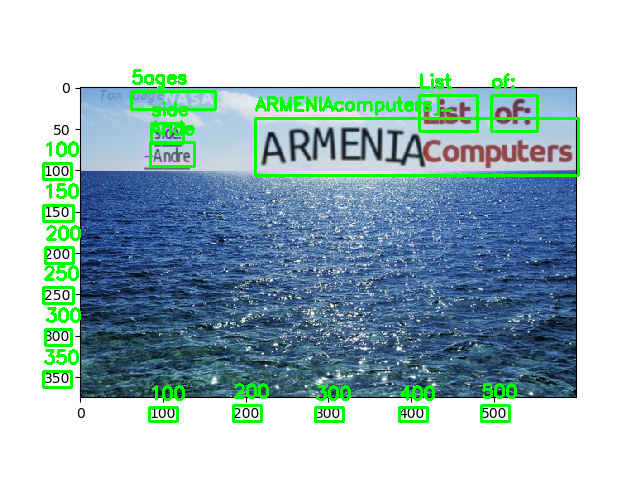

-1

In [61]:

def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()

# load the input image from disk
image = cv2.imread("sea-2.jpg")

# Recognise the input image
print("[INFO] recognising input image...")
predict = custompredict(["en"])
results = predict.readtext(image)

# loop over the results
for (bbox, text, prob) in results:
	# display the Recognise'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))

	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))

	# cleanup the text and draw the box surrounding the text along
	# with the Recognise'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 8),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

# show the output image
cv2_imshow(image)
cv2.waitKey(0)

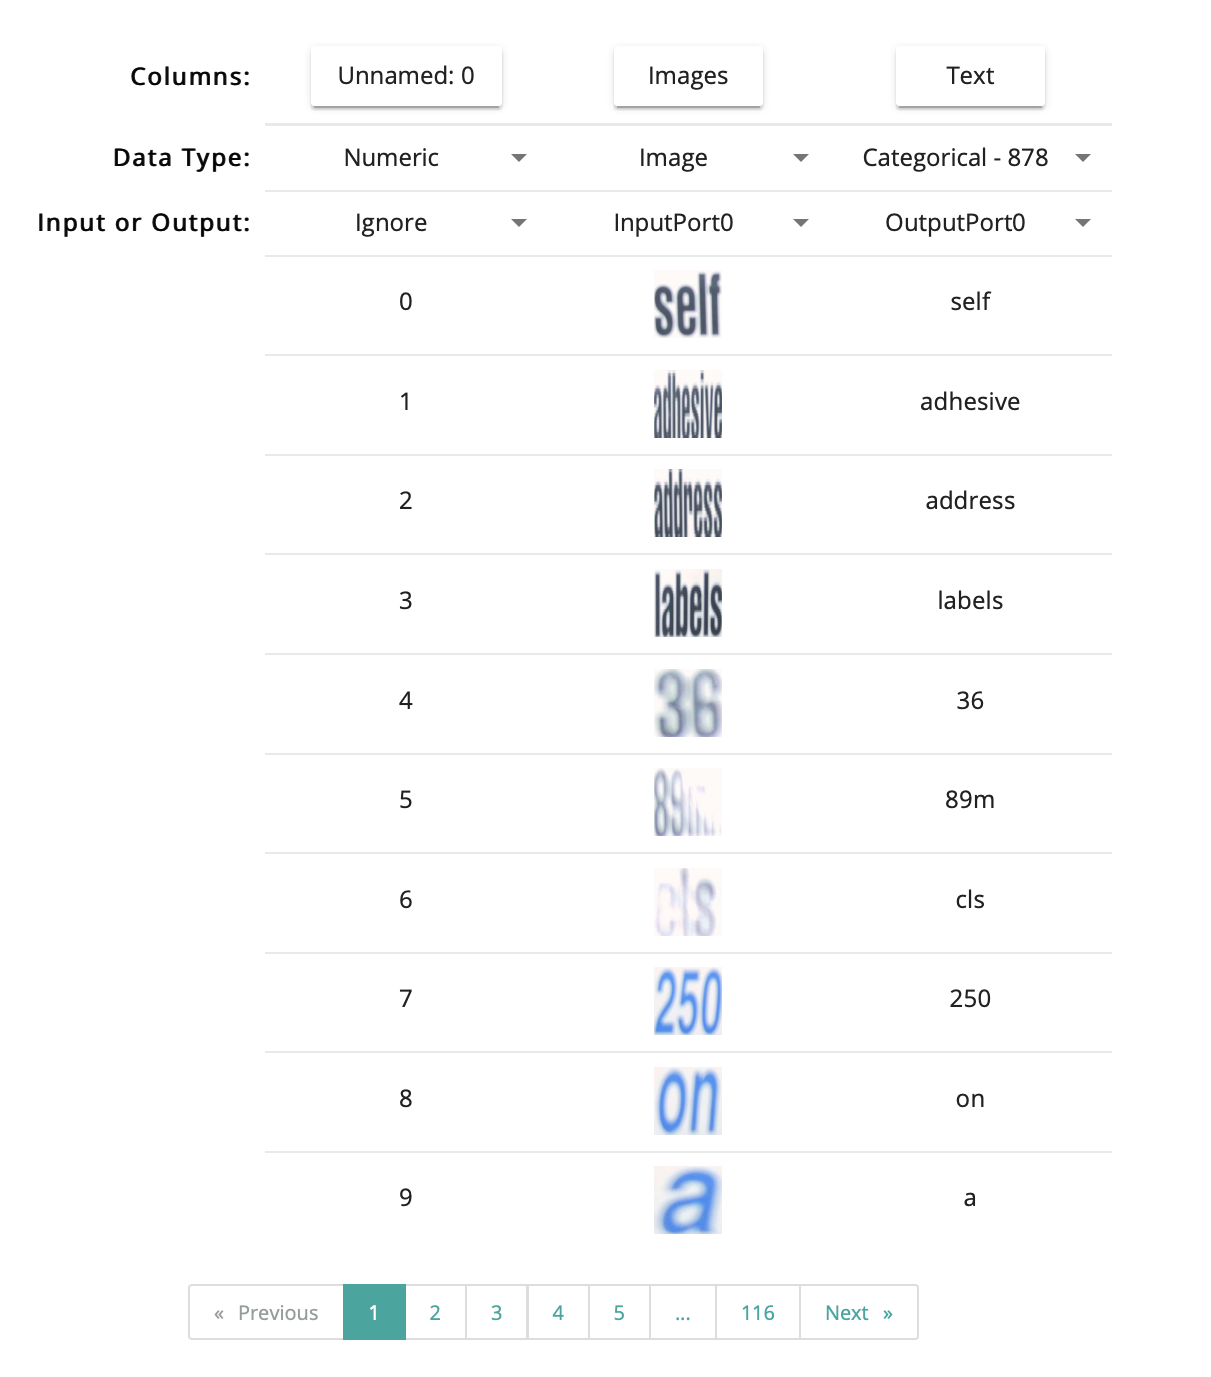

In [65]:
# Dataset View of ICDAR for Base Reference
image = cv2.imread("/content/Dataset View.png")
cv2_imshow(image)

Actual Text: address Predicted Text: address Model Accuracy: 0.987


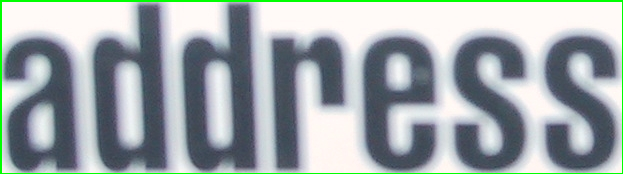

Actual Text: labels Predicted Text: labels Model Accuracy: 0.9981


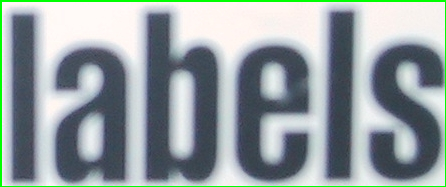

Actual Text: 250 Predicted Text: 250 Model Accuracy: 1.0


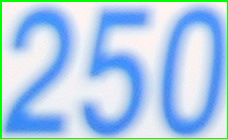

Actual Text: roll Predicted Text: roll Model Accuracy: 0.9995


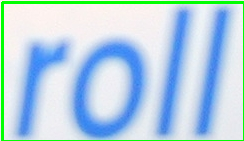

Actual Text: Natwest Predicted Text: NatWest Model Accuracy: 0.995


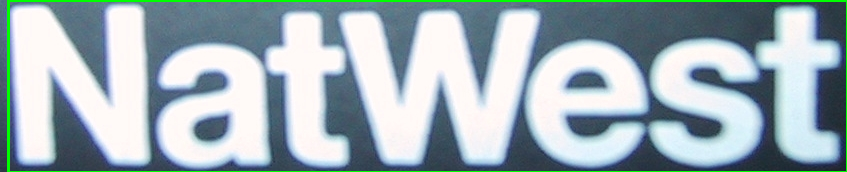

Actual Text: COOKERY Predicted Text: COOKERY Model Accuracy: 0.9922


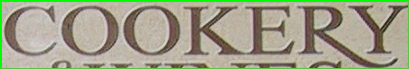

Actual Text: WINES Predicted Text: WINES Model Accuracy: 0.9931


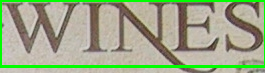

Actual Text: Intensely Predicted Text: Intensely Model Accuracy: 0.9966


Actual Text: moving Predicted Text: moving Model Accuracy: 0.9934


Actual Text: Both Predicted Text: Both Model Accuracy: 0.986


Actual Text: deeply Predicted Text: deeply Model Accuracy: 0.9998


Actual Text: DIGItaL Predicted Text: DIGItal Model Accuracy: 0.9944


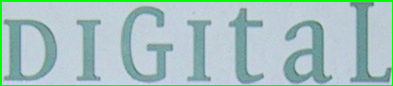

Actual Text: WILEY Predicted Text: WILEY Model Accuracy: 0.9993


Actual Text: Nigel Predicted Text: Nigel Model Accuracy: 0.9999


Actual Text: Chapman Predicted Text: Chapman Model Accuracy: 1.0


Actual Text: and Predicted Text: an Model Accuracy: 0.9977


Actual Text: Jenny Predicted Text: Jenny Model Accuracy: 0.9996


Actual Text: Chapman Predicted Text: Chapman Model Accuracy: 1.0


Actual Text: Software Predicted Text: Software Model Accuracy: 0.9998


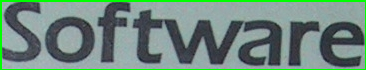

Actual Text: Design Predicted Text: Design Model Accuracy: 0.9999


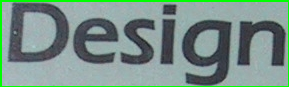

Actual Text: for Predicted Text: for Model Accuracy: 1.0


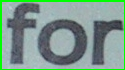

Actual Text: Systems Predicted Text: Systems Model Accuracy: 0.9996


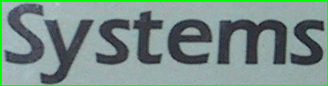

Actual Text: Systems Predicted Text: Systems Model Accuracy: 0.9996


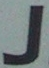

Actual Text: E Predicted Text: E Model Accuracy: 0.9953


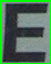

Actual Text: Cable Predicted Text: Cable Model Accuracy: 0.9981


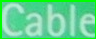

Actual Text: DLR Predicted Text: DLR Model Accuracy: 0.9992


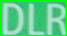

Actual Text: 3P Predicted Text: 3P Model Accuracy: 0.9909


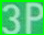

Actual Text: 6210 Predicted Text: 6210 Model Accuracy: 0.9988


Actual Text: Professional Predicted Text: Professional Model Accuracy: 0.9999


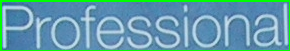

Actual Text: Issues Predicted Text: Issues Model Accuracy: 0.999


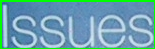

Actual Text: in Predicted Text: in Model Accuracy: 0.9962


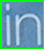

Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


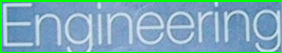

Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


Actual Text: Engineering Predicted Text: Engineering Model Accuracy: 0.9932


KeyboardInterrupt: ignored

In [64]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()
 
accuracy_list = []
def accuracy_list_append(accuracy):
  if accuracy > 0.98:
    accuracy_list.append(accuracy)
    
doc = xml.parse("word.xml")
total_images = len(doc.getElementsByTagName("image"))
accuracy = 0
threshold = 0.98
image_count = 0 
image_accuracy = 0
image_count_list = []
image_accuracy_list = []
actual_text = ""
predicted_text = ""

for image in doc.getElementsByTagName("image"):
  image_path = image.getAttribute("file")
  #print("Image Path", image_path)
  image_text = image.getAttribute("tag")
  #print("Image Text", image_text)
  
  image = Image.open(image_path)
  data = asarray(image)
  
  # load the input image from disk
  image = cv2.imread(image_path)

  # Recognise the input image using NeuralNetwork
  #print("[INFO] recognising input image...")
  predict = custompredict(["en"])
  results = predict.readtext(image) 

  # loop over the results
  for (bbox, text, prob) in results:
    # display the Recognise'd text and associated probability
    #print("[INFO] {:.4f}: {}".format(prob, text))
    accuracy = float("{:.4f}".format(prob))
    accuracy_list_append(accuracy)
    actual_text = image_text
    predicted_text = text
    # unpack the bounding box
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))

    # cleanup the text and draw the box surrounding the text along
    # with the Recognise'd text itself
    text = cleanup_text(text)
    cv2.rectangle(image, tl, br, (0, 255, 0), 2)
    cv2.putText(image, text, (tl[0], tl[1] - 8), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

  # show the output image
  if(accuracy > threshold):
    image_count += 1
    image_accuracy_list.append(accuracy)
    image_count_list.append(image_count)
    print("Actual Text:", actual_text, "Predicted Text:", predicted_text, "Model Accuracy:", accuracy)
    cv2_imshow(image)
    #cv2.waitKey(0)

print("Model Average Accuracy on ",total_images, "images", len(sum(accuracy_list)/accuracy_list) * 100)
plt.settitle("Model Accuracy vs Images")
plt.xlabel("Model Accuracy")
plt.ylabel("Curved Text Images")
plt.plot(image_accuracy_list, image_count_list, color="red")

Model Average Accuracy on  1156 images 99.70518987341784


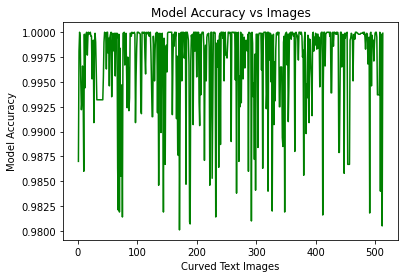

In [15]:
print("Model Average Accuracy on ",total_images, "images", sum(accuracy_list)/len(accuracy_list) * 100)
plt.title("Model Accuracy vs Images")
plt.ylabel("Model Accuracy")
plt.xlabel("Curved Text Images")
plt.plot(image_count_list, image_accuracy_list, color="green")